## Dependencies

In [ ]:
pip install opencv-contrib-python

In [ ]:
pip install Pillow

In [ ]:
pip install scikit-image

## Load Model

In [1]:
# Model weights downloaded from: https://github.com/fannymonori/TF-ESPCN
# Author: Fanny Monori
# TensorFlow ESPCN implementation for super-resolution


In [1]:
import cv2
from cv2 import dnn_superres
from PIL import Image

sr=dnn_superres.DnnSuperResImpl_create()
# Ensure the ESPCN model file ('ESPCN_x4.pb') is downloaded and placed in the 'weights' directory
path= 'weights//ESPCN_x4.pb'
sr.readModel(path)
sr.setModel('espcn',4)

## Demo

### Restore Single Image

In [5]:
import cv2
from cv2 import dnn_superres
from PIL import Image
import numpy as np

# Initialize the ESPCN super-resolution model
sr = dnn_superres.DnnSuperResImpl_create()
model_path = r'weights\ESPCN_x4.pb'  # Adjust path format if needed
sr.readModel(model_path)
sr.setModel('espcn', 4)

# Input image path
input_image_path = r'1026.jpg'  # Adjust path format if needed

# Load the input image using PIL to get original size
img_pil = Image.open(input_image_path)
original_width, original_height = img_pil.size

# Resize the image using PIL
new_width = original_width // 4
new_height = original_height // 4
resized_img = img_pil.resize((new_width, new_height), Image.LANCZOS)

# Convert PIL image to OpenCV format (numpy array)
resized_image = cv2.cvtColor(np.array(resized_img), cv2.COLOR_RGB2BGR)

# Perform super-resolution on the resized image
upscaled_image = sr.upsample(resized_image)

# Output image path
output_image_path = r'1026_Restored.png'  # Adjust path format if needed

# Save the upscaled image
cv2.imwrite(output_image_path, upscaled_image)
print(f"Upscaled image saved: {output_image_path}")


Upscaled image saved: 1026_Restored.png


### Restore multiple Images

In [10]:
import os
import cv2
from cv2 import dnn_superres
from PIL import Image
import numpy as np

# Initialize the ESPCN super-resolution model
sr = dnn_superres.DnnSuperResImpl_create()
model_path = r'weights\ESPCN_x4.pb'  # Adjust path format if needed
sr.readModel(model_path)
sr.setModel('espcn', 4)

# Input and output folders
input_folder = r'input//low_res'  # Replace with your input folder path
output_folder = r'output//'  # Replace with your output folder path

# Ensure output folder exists, create if not
os.makedirs(output_folder, exist_ok=True)

# Process each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
        input_image_path = os.path.join(input_folder, filename)
        
        # Load the input image using PIL to get original size
        img_pil = Image.open(input_image_path)
        original_width, original_height = img_pil.size
        
        # Resize the image using PIL
        new_width = original_width // 4
        new_height = original_height // 4
        resized_img = img_pil.resize((new_width, new_height), Image.LANCZOS)
        
        # Convert PIL image to OpenCV format (numpy array)
        resized_image = cv2.cvtColor(np.array(resized_img), cv2.COLOR_RGB2BGR)
        
        # Perform super-resolution on the resized image
        upscaled_image = sr.upsample(resized_image)
        
        # Output image path
        output_image_path = os.path.join(output_folder, f'{os.path.splitext(filename)[0]}_Restored.png')
        
        # Save the upscaled image
        cv2.imwrite(output_image_path, upscaled_image)
        print(f"Upscaled image saved: {output_image_path}")


Upscaled image saved: output//0001_Restored.png
Upscaled image saved: output//0002_Restored.png
Upscaled image saved: output//0003_Restored.png
Upscaled image saved: output//0004_Restored.png
Upscaled image saved: output//0005_Restored.png
Upscaled image saved: output//0006_Restored.png
Upscaled image saved: output//0007_Restored.png
Upscaled image saved: output//0008_Restored.png
Upscaled image saved: output//0009_Restored.png
Upscaled image saved: output//0010_Restored.png
Upscaled image saved: output//0011_Restored.png
Upscaled image saved: output//0012_Restored.png
Upscaled image saved: output//0013_Restored.png
Upscaled image saved: output//0014_Restored.png
Upscaled image saved: output//0015_Restored.png
Upscaled image saved: output//0016_Restored.png
Upscaled image saved: output//0017_Restored.png
Upscaled image saved: output//0018_Restored.png
Upscaled image saved: output//0019_Restored.png
Upscaled image saved: output//0020_Restored.png


## Validation using peak signal-to-noise ratio (PSNR)

PSNR Values: 			 Ground Truth to Pixelated 	 Ground Truth to Restored

PSNR for 0001.jpg 		 27.27 dB 			 29.48 dB
PSNR for 0002.png 		 26.24 dB 			 27.93 dB
PSNR for 0003.jpg 		 24.55 dB 			 27.08 dB
PSNR for 0004.png 		 17.89 dB 			 19.58 dB
PSNR for 0005.jpg 		 30.48 dB 			 33.98 dB
PSNR for 0006.png 		 29.58 dB 			 31.11 dB
PSNR for 0007.jpg 		 25.56 dB 			 27.30 dB
PSNR for 0008.png 		 19.26 dB 			 20.45 dB
PSNR for 0009.png 		 24.35 dB 			 26.77 dB
PSNR for 0010.jpg 		 25.11 dB 			 27.39 dB
PSNR for 0011.png 		 27.23 dB 			 29.26 dB
PSNR for 0012.jpg 		 27.12 dB 			 28.51 dB
PSNR for 0013.png 		 28.56 dB 			 30.61 dB
PSNR for 0014.png 		 21.52 dB 			 23.34 dB
PSNR for 0015.jpg 		 32.52 dB 			 37.17 dB
PSNR for 0016.jpg 		 33.20 dB 			 36.38 dB
PSNR for 0017.jpg 		 26.65 dB 			 28.87 dB
PSNR for 0018.png 		 19.55 dB 			 21.76 dB
PSNR for 0019.png 		 24.49 dB 			 26.80 dB
PSNR for 0020.jpg 		 21.05 dB 			 24.66 dB

Average PSNR (Ground truth vs Pixelated): 25.61 dB
Average PSNR (Gro

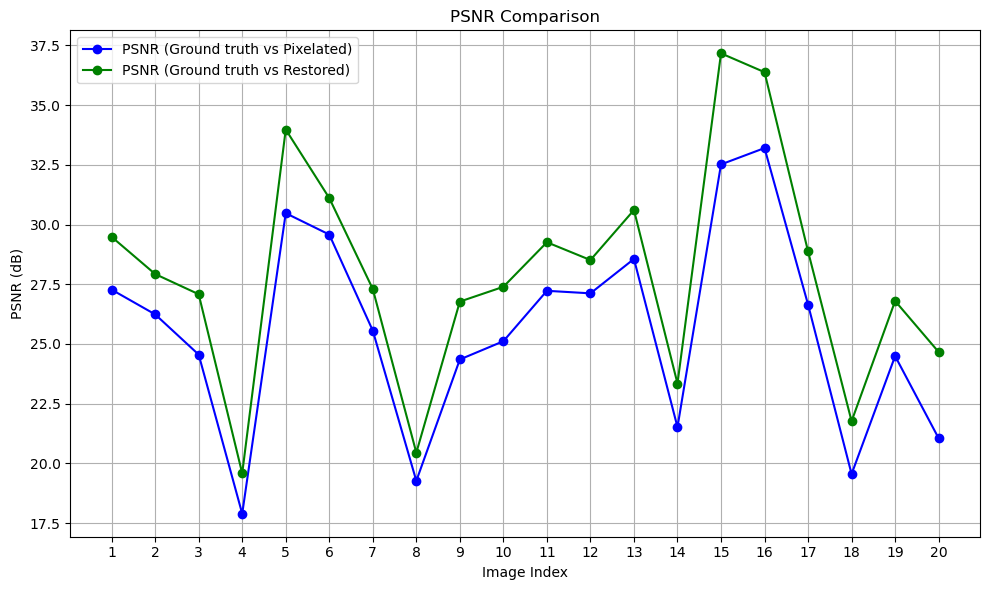

In [12]:
import os
import cv2
import numpy as np
from PIL import Image
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt

def calculate_psnr(img1, img2):
    return psnr(img1, img2)

# Path to folders
folder1_path = r'input/high_res'  # Replace with actual path to Ground truth image folder
folder2_path = r'input/low_res'   # Replace with actual path to pixelated image folder
folder3_path = r'output'            # Replace with actual path to restored image folder

# Initialize lists to store PSNR values
psnr_values1_2 = []
psnr_values1_3 = []

# Ensure all folders have the same number of images in sorted order
folder1_files = sorted(os.listdir(folder1_path))
folder2_files = sorted(os.listdir(folder2_path))
folder3_files = sorted(os.listdir(folder3_path))

# Iterate through each pair of images in the folders
print("PSNR Values: \t\t\t Ground Truth to Pixelated \t Ground Truth to Restored\n")
for filename1, filename2, filename3 in zip(folder1_files, folder2_files, folder3_files):
    if filename1.endswith('.png') or filename1.endswith('.jpg') or filename1.endswith('.jpeg'):
        image1_path = os.path.join(folder1_path, filename1)
        image2_path = os.path.join(folder2_path, filename2)
        image3_path = os.path.join(folder3_path, filename3)
        
        # Load images
        img1_pil = Image.open(image1_path)
        img2_pil = Image.open(image2_path)
        img3_pil = Image.open(image3_path)
        
        # Convert PIL images to numpy arrays (OpenCV format)
        img1 = cv2.cvtColor(np.array(img1_pil), cv2.COLOR_RGB2BGR)
        img2 = cv2.cvtColor(np.array(img2_pil), cv2.COLOR_RGB2BGR)
        img3 = cv2.cvtColor(np.array(img3_pil), cv2.COLOR_RGB2BGR)
        
        # Calculate PSNR between corresponding images from folder1 and folder2
        psnr_value1_2 = calculate_psnr(img1, img2)
        psnr_values1_2.append(psnr_value1_2)
        
        # Calculate PSNR between corresponding images from folder1 and folder3
        psnr_value1_3 = calculate_psnr(img1, img3)
        psnr_values1_3.append(psnr_value1_3)
        
        # Print PSNR values for each pair
        print(f"PSNR for {filename1} \t\t {psnr_value1_2:.2f} dB \t\t\t {psnr_value1_3:.2f} dB")

# Calculate average
average_psnr1_2 = np.mean(psnr_values1_2)
average_psnr1_3 = np.mean(psnr_values1_3)

print(f"\nAverage PSNR (Ground truth vs Pixelated): {average_psnr1_2:.2f} dB")
print(f"Average PSNR (Ground truth vs Restored): {average_psnr1_3:.2f} dB")

# Plotting PSNR values
plt.figure(figsize=(10, 6))

# Plot for Ground truth vs Pixelated
plt.plot(psnr_values1_2, marker='o', linestyle='-', color='b', label='PSNR (Ground truth vs Pixelated)')

# Plot for Ground truth vs Restored
plt.plot(psnr_values1_3, marker='o', linestyle='-', color='g', label='PSNR (Ground truth vs Restored)')

plt.xlabel('Image Index')
plt.ylabel('PSNR (dB)')
plt.title('PSNR Comparison')

# Set x-axis to match the number of images
num_images = len(psnr_values1_2)
plt.xticks(range(num_images), range(1, num_images + 1))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Structural Similarity Index (SSIM)

In [35]:
from skimage.metrics import structural_similarity as compare_ssim
import cv2

# Function to compute SSIM between two images
def calculate_ssim(image1_path, image2_path):
    # Load images
    img1 = cv2.imread(image1_path)
    img2 = cv2.imread(image2_path)

    # Convert images to grayscale if needed
    if len(img1.shape) > 2 and img1.shape[2] > 1:
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Compute SSIM between two images
    ssim_index, _ = compare_ssim(img1, img2, full=True)
    
    return ssim_index

# Example usage:
image1_path = 'C:\\Users\\admin\\Desktop\\Image Restoration\\input\\high_res\\0005.jpg'
image2_path = 'C:\\Users\\admin\\Desktop\\Image Restoration\\output\\0005_Restored.png'

ssim_index = calculate_ssim(image1_path, image2_path)
print(f"SSIM Index: {ssim_index}")


SSIM Index: 0.9424330925129959


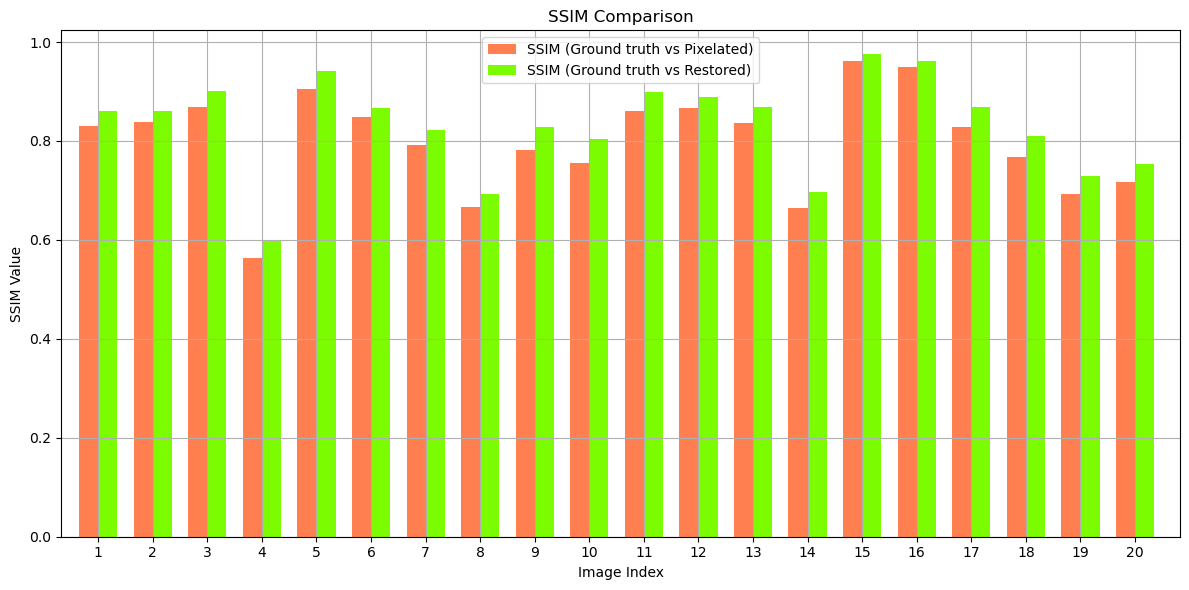

Mean SSIM (Ground truth vs Pixelated): 0.7997
Mean SSIM (Ground truth vs Restored): 0.8315


In [1]:
from skimage.metrics import structural_similarity as compare_ssim
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Function to compute SSIM between corresponding images from three folders
def calculate_ssim_between_folders(folder_gt, folder_pixelated, folder_restored):
    ssim_values_gt_pixelated = []  # For SSIM between ground truth and pixelated
    ssim_values_gt_restored = []   # For SSIM between ground truth and restored
    
    # List all image files in all three folders
    folder_gt_files = sorted([os.path.join(folder_gt, f) for f in os.listdir(folder_gt) if f.endswith('.jpg') or f.endswith('.png')])
    folder_pixelated_files = sorted([os.path.join(folder_pixelated, f) for f in os.listdir(folder_pixelated) if f.endswith('.jpg') or f.endswith('.png')])
    folder_restored_files = sorted([os.path.join(folder_restored, f) for f in os.listdir(folder_restored) if f.endswith('.jpg') or f.endswith('.png')])
    
    # Ensure all folders have the same number of images
    num_images = min(len(folder_gt_files), len(folder_pixelated_files), len(folder_restored_files))
    
    for i in range(num_images):
        img_gt_path = folder_gt_files[i]
        img_pixelated_path = folder_pixelated_files[i]
        img_restored_path = folder_restored_files[i]
        
        # Load images
        img_gt = cv2.imread(img_gt_path)
        img_pixelated = cv2.imread(img_pixelated_path)
        img_restored = cv2.imread(img_restored_path)
        
        # Convert images to grayscale if needed
        if len(img_gt.shape) > 2 and img_gt.shape[2] > 1:
            img_gt = cv2.cvtColor(img_gt, cv2.COLOR_BGR2GRAY)
            img_pixelated = cv2.cvtColor(img_pixelated, cv2.COLOR_BGR2GRAY)
            img_restored = cv2.cvtColor(img_restored, cv2.COLOR_BGR2GRAY)
        
        # Compute SSIM between images
        ssim_gt_pixelated, _ = compare_ssim(img_gt, img_pixelated, full=True)
        ssim_gt_restored, _ = compare_ssim(img_gt, img_restored, full=True)
        
        ssim_values_gt_pixelated.append(ssim_gt_pixelated)
        ssim_values_gt_restored.append(ssim_gt_restored)
        
    # Calculate mean SSIM values
    mean_ssim_gt_pixelated = np.mean(ssim_values_gt_pixelated)
    mean_ssim_gt_restored = np.mean(ssim_values_gt_restored)
    
    return ssim_values_gt_pixelated, ssim_values_gt_restored, mean_ssim_gt_pixelated, mean_ssim_gt_restored

# Example usage:
folder_gt_path = 'input\\high_res'
folder_pixelated_path = 'input\\low_res'
folder_restored_path = 'output'

ssim_values_gt_pixelated, ssim_values_gt_restored, mean_ssim_gt_pixelated, mean_ssim_gt_restored = calculate_ssim_between_folders(folder_gt_path, folder_pixelated_path, folder_restored_path)

# Plotting SSIM values as a bar graph
num_images = len(ssim_values_gt_pixelated)
indices = np.arange(num_images)

bar_width = 0.35
plt.figure(figsize=(12, 6))

# Bars for Ground truth vs Pixelated
plt.bar(indices, ssim_values_gt_pixelated, bar_width, color='coral', label='SSIM (Ground truth vs Pixelated)')

# Bars for Ground truth vs Restored
plt.bar(indices + bar_width, ssim_values_gt_restored, bar_width, color='lawngreen', label='SSIM (Ground truth vs Restored)')

plt.xlabel('Image Index')
plt.ylabel('SSIM Value')
plt.title('SSIM Comparison')

# Set x-axis ticks and limit to match the number of images
plt.xticks(indices + bar_width / 2, range(1, num_images + 1))
plt.xlim(-0.5, num_images)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print mean SSIM values
print(f"Mean SSIM (Ground truth vs Pixelated): {mean_ssim_gt_pixelated:.4f}")
print(f"Mean SSIM (Ground truth vs Restored): {mean_ssim_gt_restored:.4f}")


## FPS for images of size 1920x1080

In [34]:
import os
import cv2
from cv2 import dnn_superres
from PIL import Image
import numpy as np
import time

# Initialize the ESPCN super-resolution model
sr = dnn_superres.DnnSuperResImpl_create()
model_path = r'weights\ESPCN_x4.pb'  # Adjust path format if needed
sr.readModel(model_path)
sr.setModel('espcn', 4)

# Input folder
input_folder = r'input\\low_res'  # Replace with your input folder path

# Variables to track total FPS calculation
total_fps = 0.0
num_images = 0

# Process each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
        input_image_path = os.path.join(input_folder, filename)
        
        # Load the input image using PIL to get original size
        img_pil = Image.open(input_image_path)
        original_width, original_height = img_pil.size
        
        # Resize the image using PIL
        new_width = original_width // 4
        new_height = original_height // 4
        resized_img = img_pil.resize((new_width, new_height), Image.LANCZOS)
        
        # Convert PIL image to OpenCV format (numpy array)
        resized_image = cv2.cvtColor(np.array(resized_img), cv2.COLOR_RGB2BGR)
        
        # Perform super-resolution on the resized image and measure FPS
        start_time = time.time()
        upscaled_image = sr.upsample(resized_image)
        end_time = time.time()
        
        # Calculate FPS
        elapsed_time = end_time - start_time
        fps = 1 / elapsed_time
        
        # Accumulate total FPS
        total_fps += fps
        num_images += 1

# Calculate average FPS
if num_images > 0:
    average_fps = total_fps / num_images
    print(f"Average FPS across {num_images} images: {average_fps:.2f}")
else:
    print("No images processed.")


Average FPS across 20 images: 5.59
